### Breast Cancer Prediction

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

In [2]:
df_cancer_data = pd.read_csv("data/breast_cancer_data.csv")
cancer_df = df_cancer_data.copy()

features = list(df_cancer_data.columns[1:])
labels = list(df_cancer_data['label'].unique())

print("feature names:", features)
print("label names:", labels)

feature names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']
label names: ['malignant', 'maligant', 'benign']


In [3]:
cancer_df.head()

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,malignant,15.494653829645529,15.902542,103.008265,776.437239,0.104239,0.168660,0.170572,0.085668,0.205053,...,0.653654,1.096678,4.962255,80.619370,0.006669,0.034950,0.043568,0.013765,0.024093,0.004928
1,malignant,16.229870799611437,18.785613,105.176755,874.712003,0.091843,0.092548,0.081681,0.053670,0.180435,...,0.445451,1.043931,3.005373,50.407958,0.006352,0.019998,0.025324,0.012172,0.018084,0.003582
2,malignant,16.34567074196476,20.114076,107.083804,872.563251,0.099924,0.123799,0.128788,0.078310,0.189756,...,0.549625,1.057447,3.643671,62.732851,0.006757,0.031325,0.034350,0.015150,0.021459,0.004066
3,maligant,13.001009157806651,19.876997,85.889775,541.281012,0.113423,0.173069,0.146214,0.069574,0.212078,...,0.430693,1.202955,3.051434,33.614356,0.007930,0.044881,0.042972,0.014556,0.035670,0.005981
4,malignant,16.416060073302194,17.397533,107.857386,891.516818,0.097321,0.111530,0.125971,0.068575,0.179562,...,0.525532,1.045900,3.747194,59.164555,0.008718,0.024231,0.039763,0.014202,0.019236,0.004115


In [4]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

In [5]:
cancer_df.describe()

,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,219.000000,220.000000
mean,18.991963,89.866240,620.956227,0.096480,0.102879,0.085281,0.046867,0.181850,0.103957,0.393337,1.217593,2.775090,37.781034,0.007076,0.025514,0.031901,0.011762,0.020901,0.003873
std,1.427635,7.366180,106.419871,0.004961,0.019819,0.026911,0.012548,0.010816,0.606979,0.075828,0.210182,0.579317,9.988655,0.001043,0.007345,0.014102,0.002422,0.003250,0.001259
min,15.349270,74.690886,-2.645499,0.084651,0.075184,0.050771,0.028701,0.157059,0.058922,0.298005,0.898026,2.059186,27.693748,0.004994,0.016907,0.018730,0.007253,0.016181,0.002631
25%,17.914319,84.911981,558.731832,0.092797,0.089531,0.066525,0.038106,0.174944,0.061139,0.343114,1.073344,2.394331,31.843894,0.006372,0.020530,0.025373,0.010336,0.018658,0.003225
50%,18.928256,88.587737,603.806128,0.096457,0.098517,0.075748,0.042761,0.180953,0.062557,0.367863,1.165727,2.610732,34.007608,0.006837,0.023147,0.028835,0.011357,0.020193,0.003555
75%,19.995859,93.066393,655.690435,0.099817,0.113276,0.098826,0.055337,0.186354,0.064184,0.420514,1.300769,3.003888,39.042484,0.007675,0.027733,0.033620,0.012669,0.022195,0.004046
max,24.430831,121.247839,1103.740620,0.113423,0.192880,0.201971,0.100467,0.226448,9.065897,0.712896,2.561348,5.903661,80.619370,0.011088,0.054950,0.163592,0.026554,0.041861,0.013251


The `mean radius` feature is stored as `object` type, while it is a numeric feature. Let's first investigate what's going on.

In [6]:
non_numerical = pd.to_numeric(cancer_df['mean radius'], errors='coerce')

# Find non-numeric values (which are now NaN)
non_numeric_values = df_cancer_data.loc[non_numerical.isna(), 'mean radius']
non_numeric_indices = df_cancer_data.loc[non_numerical.isna(), 'mean radius'].index

# Display the rows with non-numeric values in 'mean radius'
print(non_numeric_values)

61    n12.254518716420597
Name: mean radius, dtype: object


Looks like there is an erroneous non-numeric character present in one of the values. Since there is just one such example, we can simply remove all non-numeric characters from the column and convert it to numeric.

In [7]:
cancer_df['mean radius'] = cancer_df['mean radius'].str.replace(r'[^0-9.]', '', regex=True)
cancer_df['mean radius'] = pd.to_numeric(cancer_df['mean radius']) 

In [8]:
cancer_df['mean radius'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 220 entries, 0 to 219
Series name: mean radius
Non-Null Count  Dtype  
--------------  -----  
220 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


Also, the output of `describe()` shows that the `mean area` feature might contain negative value(s). Since the area can not be a negative number, we need to check if this is intentional or an error.

In [9]:
len(cancer_df[cancer_df['mean area'] < 0])

1

Only one such value most likely indicates an error, let us get rid of it. For now, I am converting it to `NaN`, so that we can tackle it in a cleaner way with `sklearn.impute` later.

In [10]:
cancer_df.loc[cancer_df['mean radius']<0, 'mean radius'] = np.nan

We observe three different class names, but only two - malignant and benign - are expected. The class "maligant" appears to be a typo, so we should replace all instances of it with "malignant."

In [11]:
cancer_df.loc[cancer_df['label'] == 'maligant', 'label'] = 'malignant'

In [12]:
labels = [*cancer_df['label'].unique()]
labels

['malignant', 'benign']

The `symetric error` feature has a null value which needs to be addressed. Since the curve (below) is almost normally distributed, we can safely replace the null value with it's mean. We shall take care of this with `sklearn.impute.SimpleImputer()` during the preprocessing steps.

<Axes: xlabel='symmetry error', ylabel='Density'>

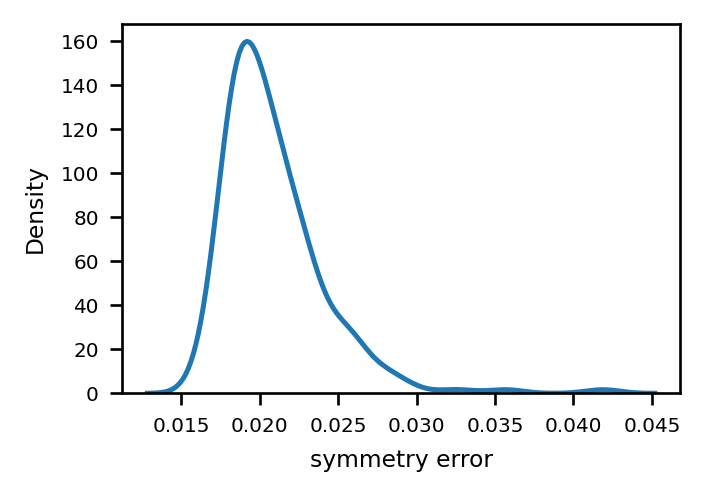

In [13]:
plt.figure(figsize=(3, 2))
sns.kdeplot(cancer_df['symmetry error'])

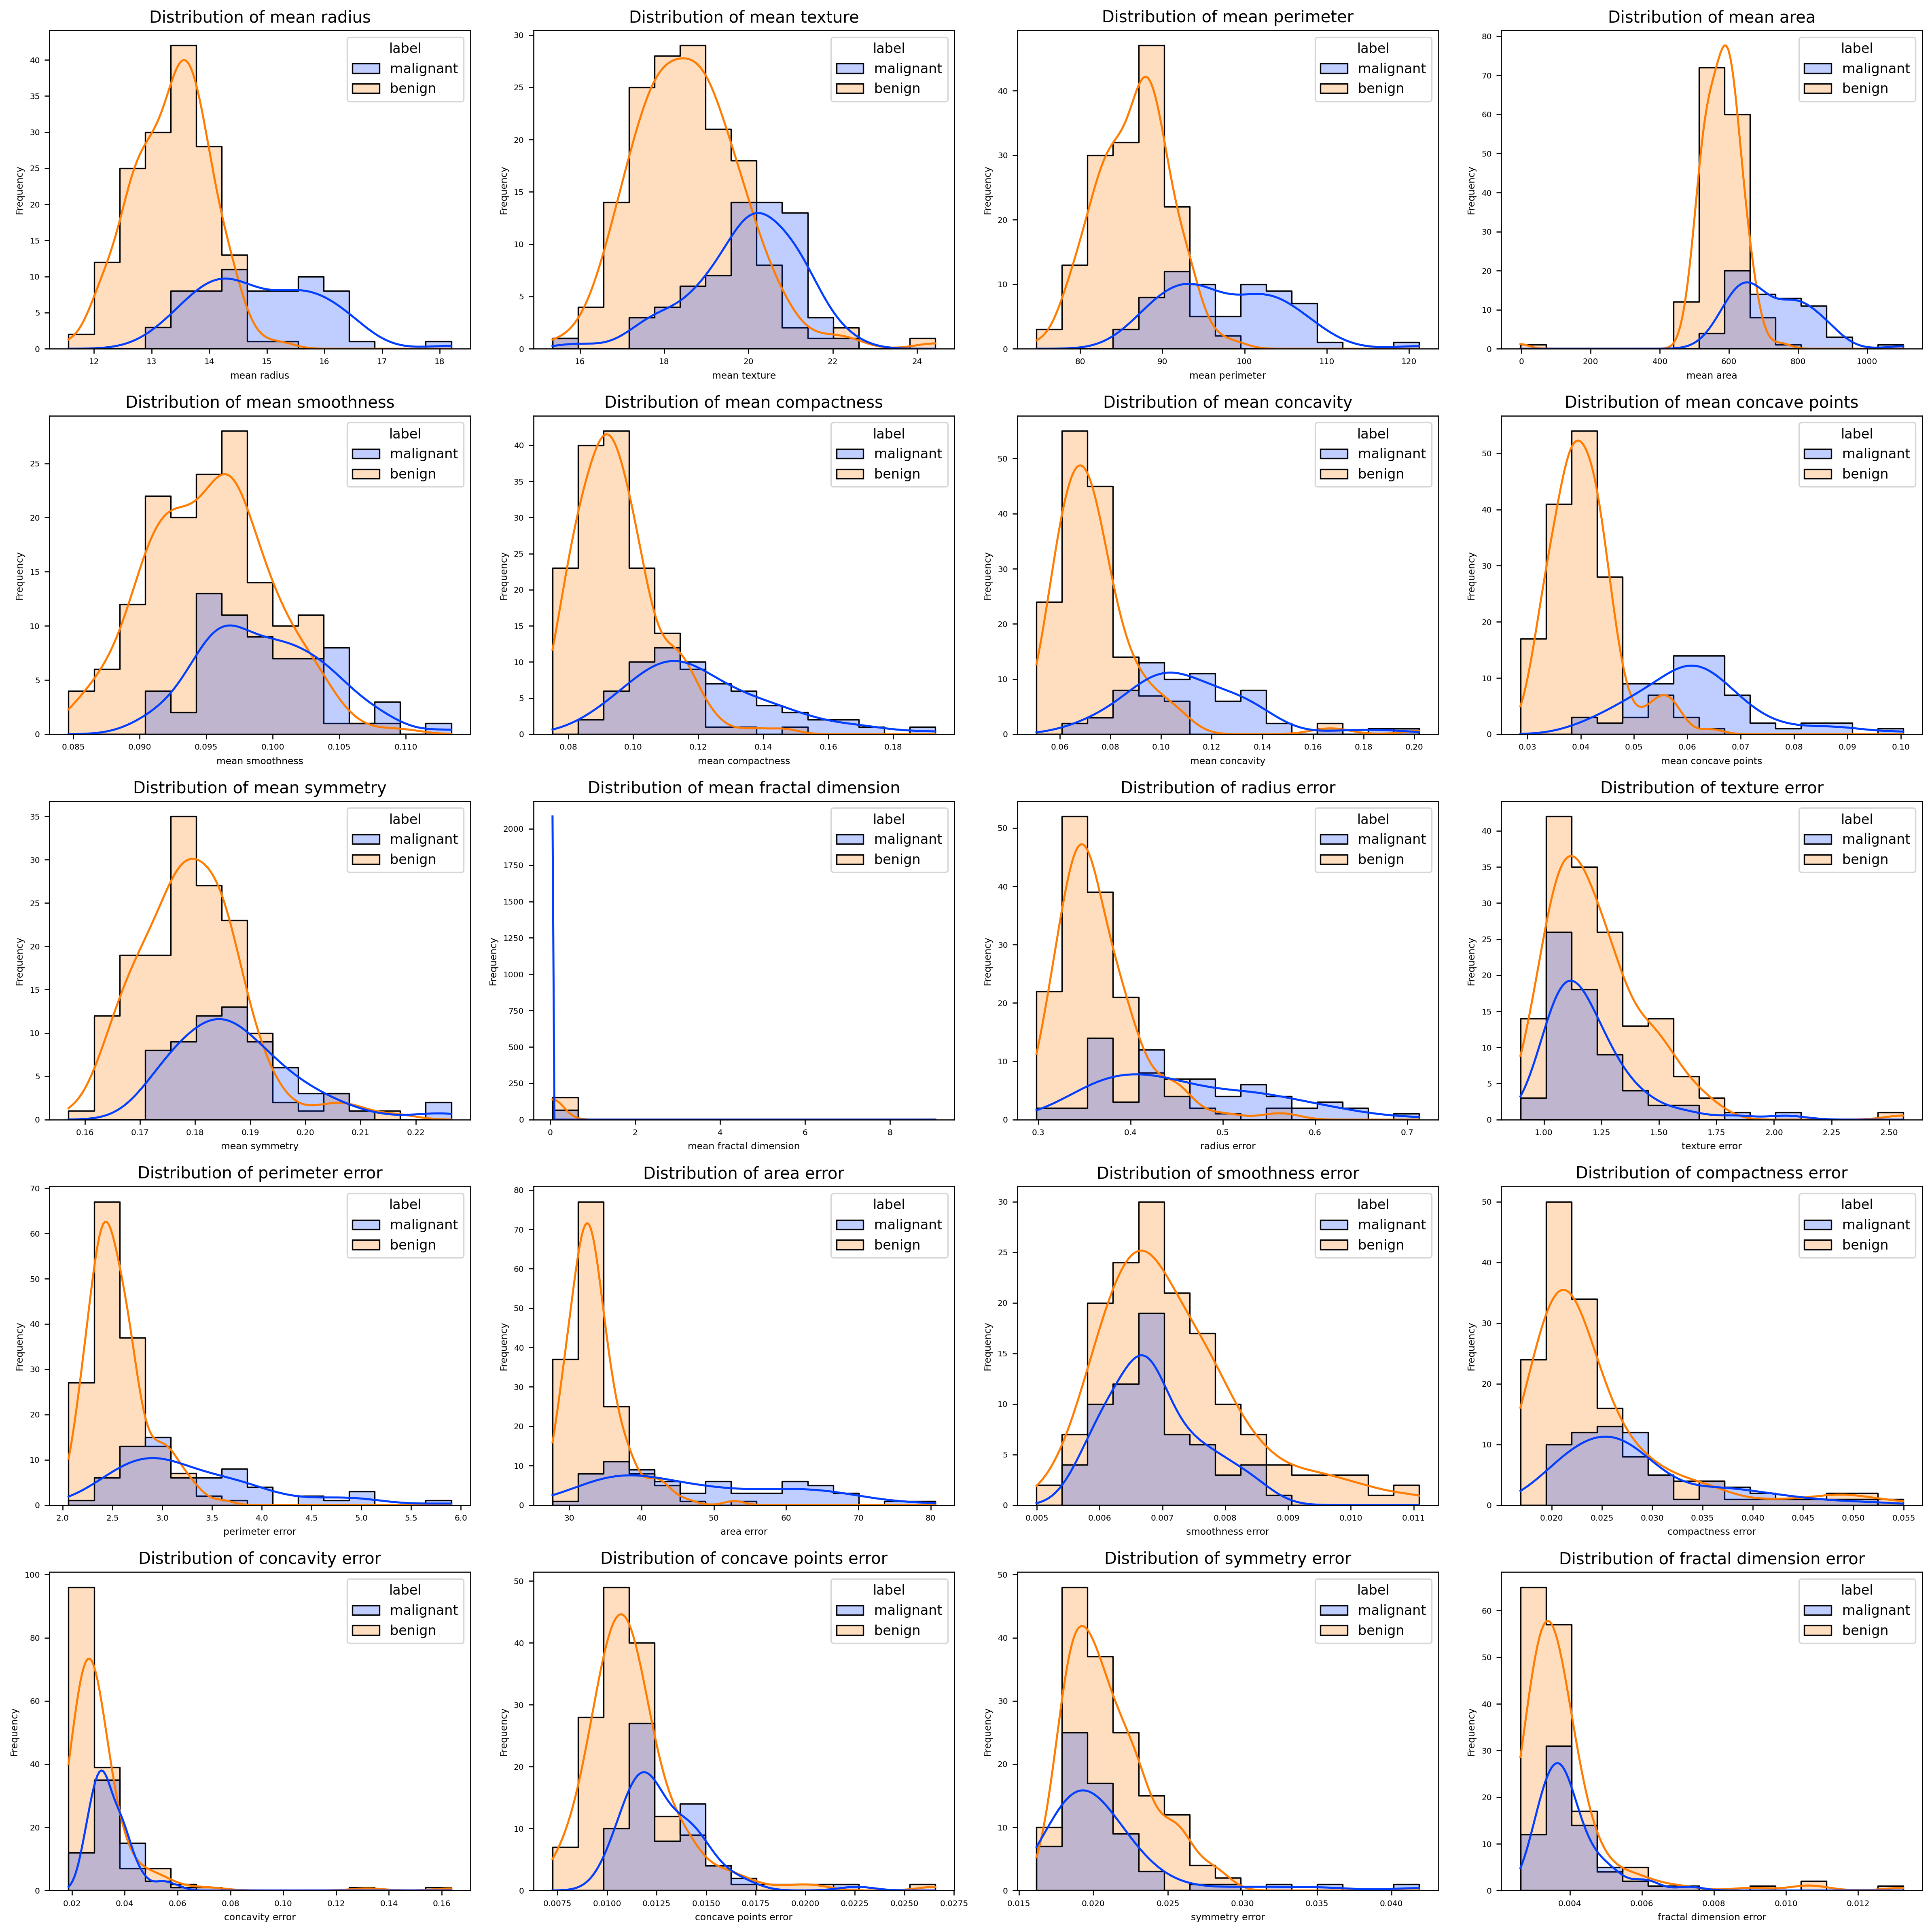

In [14]:
fig, axes = plt.subplots(5,4, figsize=(20, 20))
axes = axes.flatten()

# Loop through the features and create a histogram for each
for i, feature in enumerate(features):
    sns.histplot(data=cancer_df, x=feature, hue='label', kde=True, bins=15, ax=axes[i], element='step', stat='count', common_norm=False, palette='bright', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

As it seems, the `mean fractal dimension` might possibly contain anomalies. Let us investigate the issue with a box-plot.

<Axes: xlabel='mean fractal dimension'>

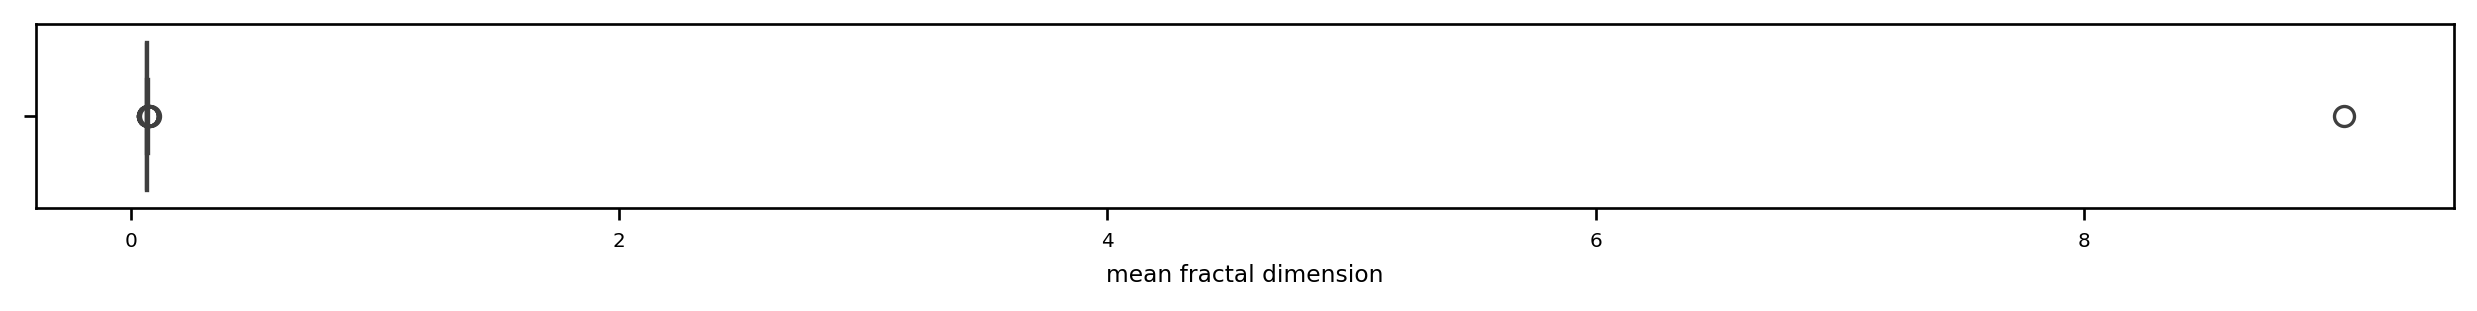

In [15]:
plt.figure(figsize=(13,1))
sns.boxplot(data=cancer_df, x='mean fractal dimension')

Finally, as the classes appear imbalanced, it might be argued that we should use oversampling techniques. However, the imabalance is not too severe (65-35%), and introducing oversampling in such a small dataset might cause overfitting, hence we shall use the dataset as it is. Moreover, the use of stratified shuffle further diminishes the effect of class imbalance...soo...we are good to go whohooo

In [16]:
from sklearn.metrics import fbeta_score, make_scorer

f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

In [34]:
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    f1_score,
    fbeta_score,
    confusion_matrix
)
from sklearn.utils.validation import check_is_fitted, NotFittedError

def evaluate_model(model, X_train, X_test, y_train, y_test, labels, conf_mat=True, figsize=(2,2)):
    
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    # Check if the model is already fitted
    try:
        check_is_fitted(model)
        print("Model is already fitted. Skipping fitting step.")
    except NotFittedError:
        print("Fitting the model...")
        model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Predict probabilities for AUC calculation
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # If the model doesn't have predict_proba, use decision function for AUC
        y_proba = model.decision_function(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    fbeta_0_1 = fbeta_score(y_test, y_pred, beta=0.1)
    fbeta_10 = fbeta_score(y_test, y_pred, beta=10)
    
    # Confusion Matrix and FPR
    if conf_mat:
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        fpr = fp / (fp + tn)
        
        plt.figure(figsize=figsize)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()
    
    # Return the scores as a dictionary
    return {
        'accuracy': accuracy,
        'balanced_accuracy': balanced_acc,
        'recall': recall,
        'precision': precision,
        'auc': auc,
        'f1_score': f1,
        'fbeta_score_0_1': fbeta_0_1,
        'fbeta_score_10': fbeta_10,
        'fpr': fpr,
        'cm': cm
    }


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

X, y = cancer_df[features], cancer_df['label']
y = LabelBinarizer(pos_label=1).fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=cancer_df['label'])


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Create a pipeline to preprocess the data
preprocess_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Fit the pipeline to the training data
X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocess_pipeline.transform(X_test)

In [37]:
X_train_preprocessed.shape, X_test_preprocessed.shape, y_train.shape, y_test.shape

((176, 20), (44, 20), (176, 1), (44, 1))

In [38]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='uniform', random_state=42)

Fitting the model...


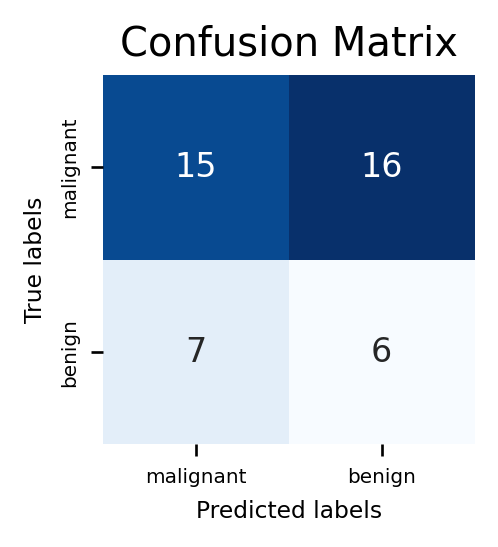

{'accuracy': 0.4772727272727273,
 'balanced_accuracy': 0.47270471464019853,
 'recall': 0.46153846153846156,
 'precision': 0.2727272727272727,
 'auc': 0.5,
 'f1_score': 0.34285714285714286,
 'fbeta_score_0_1': 0.27383642114776324,
 'fbeta_score_10': 0.4583963691376702,
 'fpr': 0.5161290322580645,
 'cm': array([[15, 16],
        [ 7,  6]])}

In [39]:
evaluate_model(dummy_clf, X_train_preprocessed, X_test_preprocessed, y_train, y_test, labels=labels)

Fitting the model...


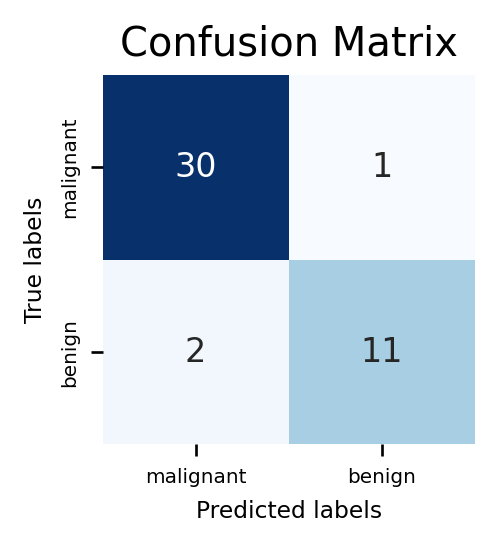

{'accuracy': 0.9318181818181818,
 'balanced_accuracy': 0.9069478908188586,
 'recall': 0.8461538461538461,
 'precision': 0.9166666666666666,
 'auc': 0.9801488833746899,
 'f1_score': 0.88,
 'fbeta_score_0_1': 0.9159109645507006,
 'fbeta_score_10': 0.8467987804878049,
 'fpr': 0.03225806451612903,
 'cm': array([[30,  1],
        [ 2, 11]])}

In [40]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
evaluate_model(sgd_clf, X_train_preprocessed, X_test_preprocessed, y_train, y_test, labels=labels)

The client's requirements are: the model must achieve at least 90% Recall (True Positive Rate) to ensure it detects malignant cancer when present,
and maintain a False Positive Rate no higher than 20% (ensuring no more than 1 in 5 benign cases are misclassified as malignant). 
Thus, Recall and False Positive Rate are the key evaluation metrics.

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, randint

# Parameter dictionary for RandomizedSearchCV
param_distributions_sgd = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'alpha': uniform(1e-4, 1 - 1e-4),  # uniform distribution between 1e-4 and 1
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': uniform(1e-4, 1 - 1e-4),  # uniform distribution between 1e-4 and 1
    'max_iter': randint(1000, 5000)  # discrete uniform distribution between 1000 and 5000
}

# Parameter dictionary for SVC with distributions
param_distributions_svc = {
    'C': uniform(0.1, 1000 - 0.1),  # uniform distribution between 0.1 and 1000
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': randint(2, 6),  # discrete uniform distribution between 2 and 5
    'gamma': ['scale', 'auto'] + list(uniform(1e-4, 1 - 1e-4).rvs(size=5)),  # mix of discrete and continuous
    'coef0': uniform(0, 1)  # uniform distribution between 0 and 1
}

# Parameter dictionary for RandomForestClassifier with distributions
param_distributions_rf = {
    'n_estimators': randint(50, 500),  # discrete uniform distribution between 50 and 500
    'max_depth': [None] + list(randint(10, 50).rvs(size=5)),  # mix of None and discrete values
    'min_samples_split': randint(2, 11),  # discrete uniform distribution between 2 and 10
    'min_samples_leaf': randint(1, 5),  # discrete uniform distribution between 1 and 4
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [42]:
params_dict = {'sgd_clf': param_distributions_sgd, 'svc_clf': param_distributions_svc, 'rf_clf': param_distributions_rf}
models = {'sgd_clf': SGDClassifier(), 'svc_clf': SVC(), 'rf_clf': RandomForestClassifier()}

In [ ]:
best_models = []
for name, model in models.items():
    print(f"Model: {model.__class__.__name__}")
    start = time.time()
    random_search = RandomizedSearchCV(model, params_dict[name], n_iter=100, scoring=f10_scorer, n_jobs=2, random_state=42)
    random_search.fit(X_train_preprocessed, y_train.ravel())
    best_models.append(random_search.best_estimator_)
    print(f"Time taken: {time.time() - start:.2f} seconds\n")

In [45]:
best_models

[SGDClassifier(alpha=0.6375937156080776, eta0=0.8872240213020689,
               learning_rate='constant', loss='modified_huber', max_iter=3660,
               penalty='l1'),
 SVC(C=374.60266483547775, coef0=0.9507143064099162, degree=4,
     gamma=0.6326213301195184, kernel='linear'),
 RandomForestClassifier(criterion='entropy', max_depth=43, min_samples_leaf=4,
                        min_samples_split=8, n_estimators=477)]

SGDClassifier
Model is already fitted. Skipping fitting step.


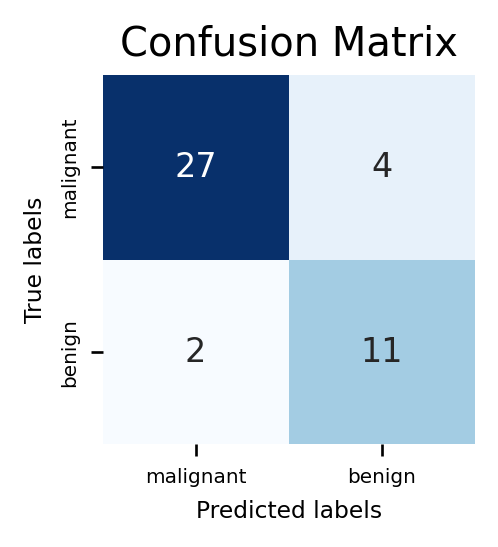

{'accuracy': 0.8636363636363636, 'balanced_accuracy': 0.858560794044665, 'recall': 0.8461538461538461, 'precision': 0.7333333333333333, 'auc': 0.9602977667493797, 'f1_score': 0.7857142857142857, 'fbeta_score_0_1': 0.7343027098479841, 'fbeta_score_10': 0.8448669201520913, 'fpr': 0.12903225806451613, 'cm': array([[27,  4],
       [ 2, 11]])}
SVC
Model is already fitted. Skipping fitting step.


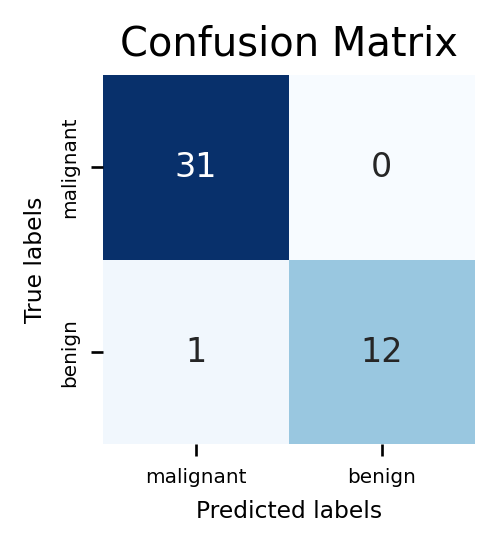

{'accuracy': 0.9772727272727273, 'balanced_accuracy': 0.9615384615384616, 'recall': 0.9230769230769231, 'precision': 1.0, 'auc': 1.0, 'f1_score': 0.96, 'fbeta_score_0_1': 0.9991755976916735, 'fbeta_score_10': 0.9237804878048781, 'fpr': 0.0, 'cm': array([[31,  0],
       [ 1, 12]])}
RandomForestClassifier
Model is already fitted. Skipping fitting step.


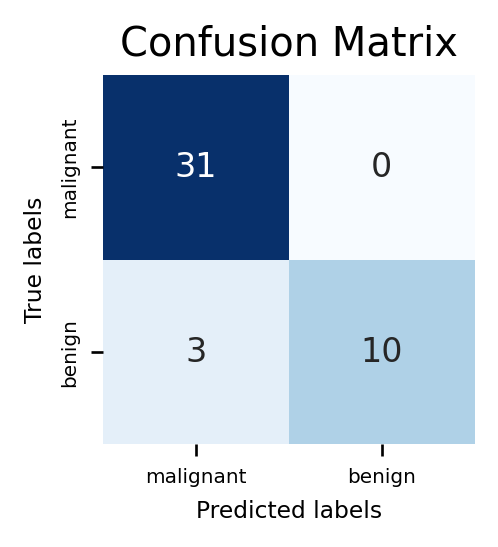

{'accuracy': 0.9318181818181818, 'balanced_accuracy': 0.8846153846153846, 'recall': 0.7692307692307693, 'precision': 1.0, 'auc': 0.9851116625310173, 'f1_score': 0.8695652173913043, 'fbeta_score_0_1': 0.9970384995064164, 'fbeta_score_10': 0.7709923664122137, 'fpr': 0.0, 'cm': array([[31,  0],
       [ 3, 10]])}


In [46]:
for model in best_models:
    print(model.__class__.__name__)
    print(evaluate_model(model, X_train_preprocessed, X_test_preprocessed, y_train, y_test, labels=labels))

Considering Recall and FPR, `SVC(C=374.60266483547775, coef0=0.9507143064099162, degree=4, gamma=0.6326213301195184, kernel='linear')` is the best model so far. We can finalize it and send it to production.

Model is already fitted. Skipping fitting step.


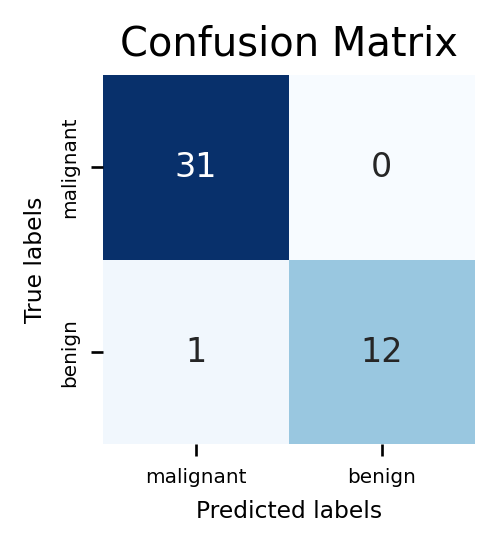

{'accuracy': 0.9772727272727273,
 'balanced_accuracy': 0.9615384615384616,
 'recall': 0.9230769230769231,
 'precision': 1.0,
 'auc': 1.0,
 'f1_score': 0.96,
 'fbeta_score_0_1': 0.9991755976916735,
 'fbeta_score_10': 0.9237804878048781,
 'fpr': 0.0,
 'cm': array([[31,  0],
        [ 1, 12]])}

In [ ]:
svm = best_models[1]
results = evaluate_model(svm, X_train_preprocessed, X_test_preprocessed, y_train, y_test, labels)
results

In [ ]:
print('Final Recall: {0}, \nFinal FPR: {1}'.format(results['recall'], results['fpr']))

Final Recall: 0.9230769230769231, 
Final FPR: 0.0


In [76]:
import joblib
joblib.dump(svm, 'svm_model.pkl')
joblib.dump(preprocess_pipeline, 'preprocess_pipeline.pkl')

['preprocess_pipeline.pkl']

In [58]:
# Answer here
import numpy as np

def calculate_false_negative_rate(confusion_matrix):
    TP = confusion_matrix[0, 0]
    FN = confusion_matrix[0, 1]

    total_malignant_cases = TP + FN
    if total_malignant_cases == 0:
        return 0.0
    
    false_negative_rate = FN / total_malignant_cases
    return false_negative_rate

false_negative_rate = calculate_false_negative_rate(results['cm'])
print(f"The probability of a false negative is: {false_negative_rate:.2f}")


The probability of a false negative is: 0.00


#### Discriminative features

In [73]:
import numpy as np

def calculate_t_score(feature_values, labels):
    """
    Calculate the T-score for a feature.

    Parameters:
    feature_values (np.ndarray): The values of the feature.
    labels (np.ndarray): The class labels.

    Returns:
    float: The T-score for the feature.
    """
    labels = labels.ravel()
    x1 = feature_values[labels == 0]
    x2 = feature_values[labels == 1]
    
    mean_x1 = np.mean(x1)
    mean_x2 = np.mean(x2)
    stddev_x1 = np.std(x1, ddof=1)  # Using ddof=1 for sample standard deviation
    stddev_x2 = np.std(x2, ddof=1)
    
    t_score = (mean_x2 - mean_x1) / (0.5 * (stddev_x2 + stddev_x1))
    return t_score

def top_discriminative_features(data, labels, n=4):
    """
    Calculate the T-score for each feature and return the indices of the top N features.

    Parameters:
    data (np.ndarray): The dataset with features (rows are samples, columns are features).
    labels (np.ndarray): The class labels.
    n (int): The number of top features to return.

    Returns:
    list: The indices of the top N features sorted by T-score.
    """
    num_features = data.shape[1]
    t_scores = np.zeros(num_features)
    
    for i in range(num_features):
        t_scores[i] = calculate_t_score(data[:, i], labels)
    
    # Get the indices of the features sorted by absolute T-score in descending order
    sorted_indices = np.argsort(np.abs(t_scores))[::-1]
    
    top_indices = sorted_indices[:n]
    for idx in top_indices:
        print(f"Feature index: {idx}, T-score: {t_scores[idx]:.4f}")
    
    return top_indices.tolist()


In [ ]:
X_full = np.r_[X_train_preprocessed, X_test_preprocessed]
y_full = np.r_[y_train, y_test]

top_feature_indices = top_discriminative_features(X_full, y_full)

In [88]:
top_features = pd.DataFrame({'Feature': X.columns[top_feature_indices], 'T-score': [calculate_t_score(X_full[:, i], y_full) for i in top_feature_indices]})
top_features

,Feature,T-score
0,mean concave points,2.338207
1,mean perimeter,1.928208
2,mean radius,1.824063
3,area error,1.737216


#### Decision Boundaries

In [74]:
def make_meshgrid(x, y, ns=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on (only min and max used)
    y: data to base y-axis meshgrid on (only min and max used)
    ns: number of steps in grid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    hx = (x_max - x_min)/ns
    hy = (y_max - y_min)/ns
    xx, yy = np.meshgrid(np.arange(x_min, x_max + hx, hx), np.arange(y_min, y_max + hy, hy))
    return xx, yy

In [75]:
def plot_contours(clf, xx, yy, xmean, n1, n2, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    xmean : 1d array of N mean values (used to populate constant features with)
    n1, n2: index numbers of features that change
              that is, which features xx and yy represent, from the set of N features
    params: dictionary of params to pass to contourf, optional
    """
    # The following lines makes an MxN matrix to pass to the classifier (# samples x # features)
    # It does this by multiplying Mx1 and 1xN matrices, where the former is filled with 1's
    #  where M is the number of grid points in xx and N is the number of features in xmean
    #  It is done in such a way that the xmean vector is replaced in each row
    fullx = np.ones((xx.ravel().shape[0],1)) * np.reshape(xmean,(1,-1))
    fullx[:,n1] = xx.ravel()
    fullx[:,n2] = yy.ravel()
    Z = clf.predict(fullx)
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [104]:
def plot_decision_boundaries(X, top_features, y, model):
    """
    Plot decision boundaries for each pair of top 4 features.

    Parameters
    ----------
    X: ndarray of shape (n_samples, n_features)
        Preprocessed data.
    top_features: list of int
        Indices of the top 4 features.
    y: ndarray of shape (n_samples,)
        Labels.
    model: A trained classifier
        The model to use for plotting decision boundaries.
    """
    assert len(top_features) == 4, "top_features must contain exactly 4 feature indices."

    feature_pairs = [(top_features[i], top_features[j]) for i in range(len(top_features)) for j in range(i + 1, len(top_features))]
    
    plt.figure(figsize=(20, 15))
    
    for k, (n1, n2) in enumerate(feature_pairs):
        plt.subplot(3, 2, k + 1)

        x = X[:, n1]
        y_ = X[:, n2]

        xx, yy = make_meshgrid(x, y_)

        xmean = np.mean(X, axis=0)
        
        plot_contours(model, xx, yy, xmean, n1, n2, alpha=0.8)
        plt.scatter(x, y_, c=y, edgecolors='k', marker='o', s=20)
        plt.xlabel(features[n1])
        plt.ylabel(features[n2])
        plt.title(f'Decision boundary for "{features[n1]}" and "{features[n2]}"')
    
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming you have a trained model `clf`, preprocessed data `X`, labels `y`, and top 4 feature indices `top_features`
# plot_decision_boundaries(X, top_features, y, clf)


In [105]:
X_full = np.r_[X_train_preprocessed, X_test_preprocessed]
y_full = np.r_[y_train, y_test]

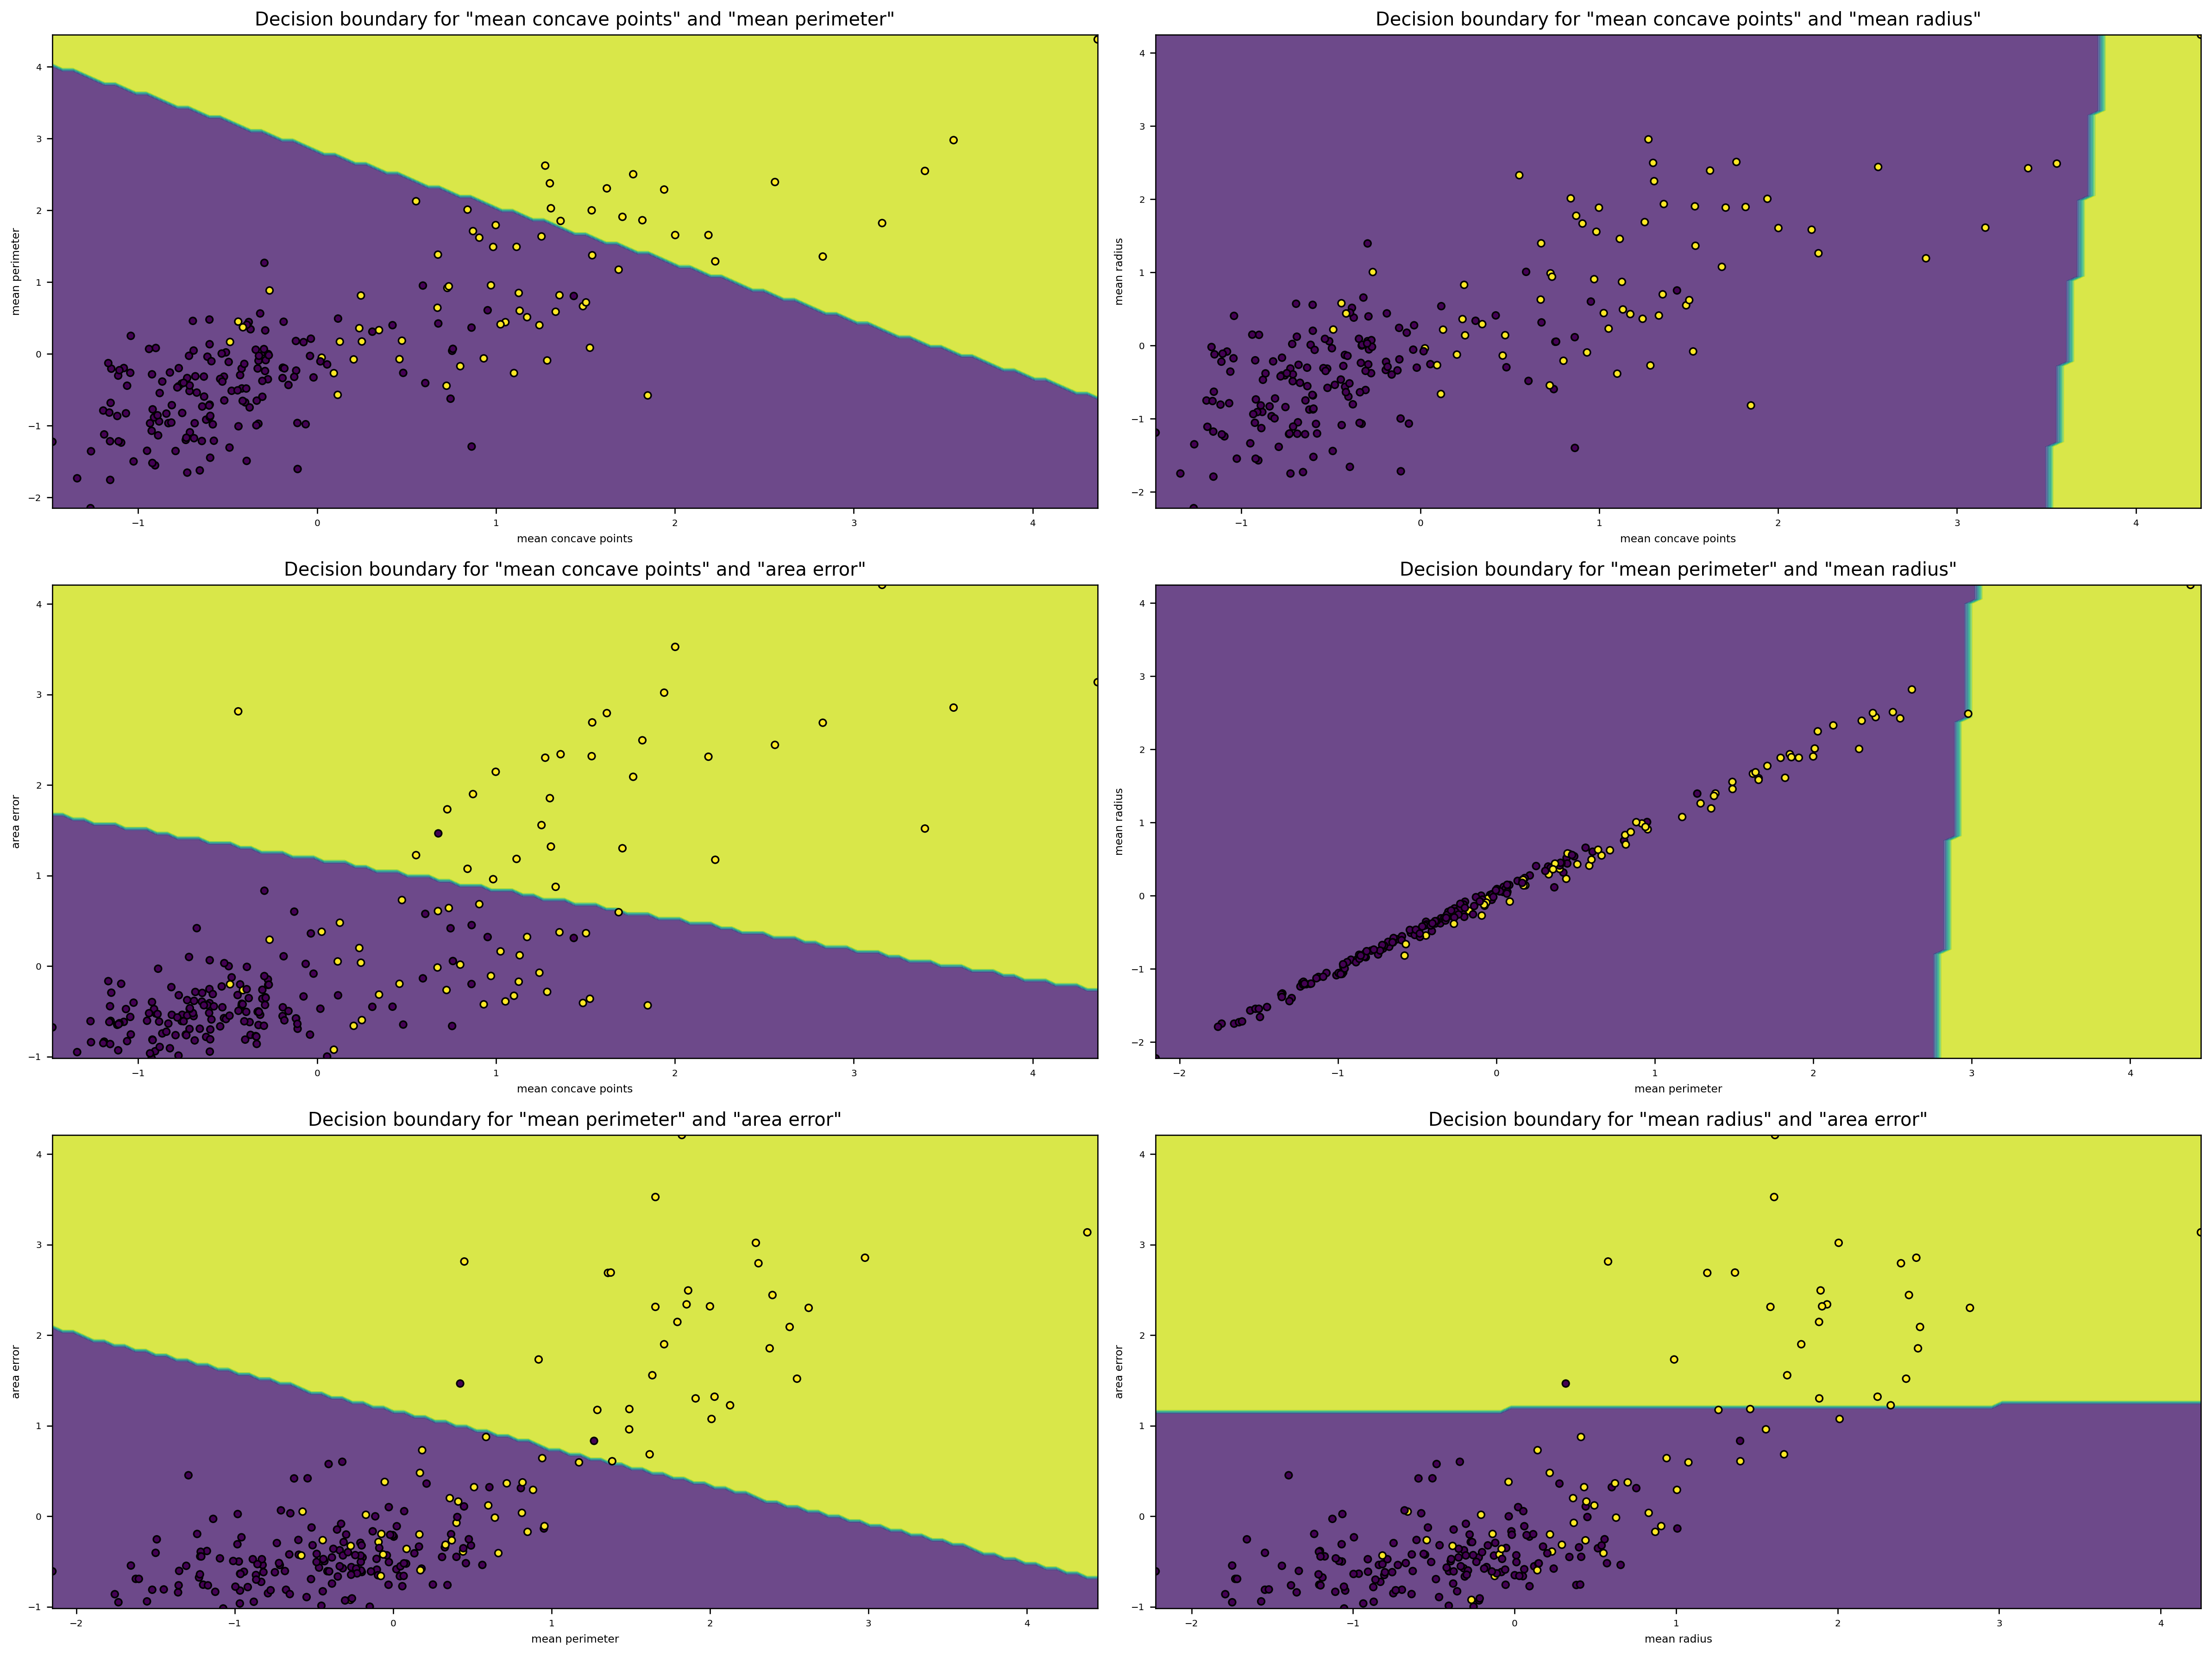

In [106]:
plot_decision_boundaries(X=X_full, top_features=top_feature_indices, y=y_full, model=svm)

The final model meets all the client's requirements, which were as follows:
1. The True Positive Rate of the final model should be greater than 0.9, or the final model should have at least a 90% probability of detecting malignant cancer when it is present.
2. The False Positive Rate should be less than 0.2, or no more than 1 in 5 healthy cases (those with benign growths) should result in a false positive (labeled as malignant)
3. The model should be explainable, using decision boundaries of discriminative features.